In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
ids
#a=tX == -999.0
#sum(a[1])

array([100000, 100001, 100002, ..., 349997, 349998, 349999])

In [5]:
print(y)

[ 1. -1. -1. ...,  1. -1. -1.]


In [43]:
tX[:,1]

array([  51.655,   68.768,  162.172, ...,   60.526,   19.362,   72.756])

In [44]:
#print(ids)
count_nan_instances=np.zeros((len(y),1))
for id in ids:
    count_nan_instances[id-100000]=sum(tX[id-100000] == -999.0)
    
    

In [45]:
np.median(count_nan)

7.0

In [46]:
count_nan_features=np.zeros((tX.shape[1],1))
for d in range(tX.shape[1]):
    count_nan_features[d]=sum(tX[:,d] == -999.0)
    

In [47]:
count_nan_features

array([[  38114.],
       [      0.],
       [      0.],
       [      0.],
       [ 177457.],
       [ 177457.],
       [ 177457.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [ 177457.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [  99913.],
       [  99913.],
       [  99913.],
       [ 177457.],
       [ 177457.],
       [ 177457.],
       [      0.]])

In [48]:
sum(count_nan_features > 0)

11

In [49]:
#from numpy import *
count_nan_features=np.zeros((tX.shape[1],1))
del_features=[]

for d in range(tX.shape[1]):
    count_nan_features[d]=sum(tX[:,d] == -999.0)
    if count_nan_features[d]>0:
            del_features=np.r_[del_features,d]
    
    
    


In [51]:
del_features

array([  0.,   4.,   5.,   6.,  12.,  23.,  24.,  25.,  26.,  27.,  28.])

In [58]:
a = tX.shape[1]


tX1 = np.delete(tX, del_features, axis=1)
        
tX1.shape


(250000, 19)

In [ ]:
np.corrcoef(tX1)

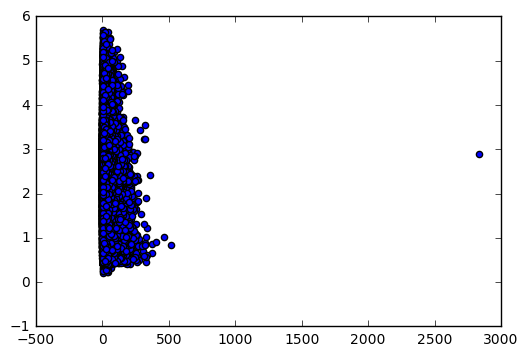

In [62]:
plt.scatter(tX1[:,4],tX1[:,3])

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)